In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
ativos = ['BBDC3','GUAR3', 'JBSS3', 'MGLU3', 'MRFG3', 'POSI3', 'VIIA3']

In [3]:
ativos = [i + '.SA' for i in ativos]

In [4]:
inicio = '2023-02-01'
fim = '2023-07-10'

In [5]:
df = yf.download(ativos, start = inicio, end = fim)['Adj Close']

[*********************100%***********************]  7 of 7 completed


In [6]:
df.head()

,BBDC3.SA,GUAR3.SA,JBSS3.SA,MGLU3.SA,MRFG3.SA,POSI3.SA,VIIA3.SA
Date,,,,,,,
2023-02-01,12.206838,4.88,19.039181,4.29,8.11,7.665048,2.35
2023-02-02,12.282621,4.99,18.793026,4.34,7.78,7.739557,2.43
2023-02-03,12.017741,4.83,18.641544,4.27,7.70,7.376328,2.31
2023-02-06,12.037361,4.68,18.101896,4.13,7.18,7.180744,2.20
2023-02-07,11.958878,4.55,17.789469,4.05,6.81,7.003787,2.10


#### normalizando os ativos


In [7]:
normalizado = df/df.iloc[0]

<Axes: xlabel='Date'>

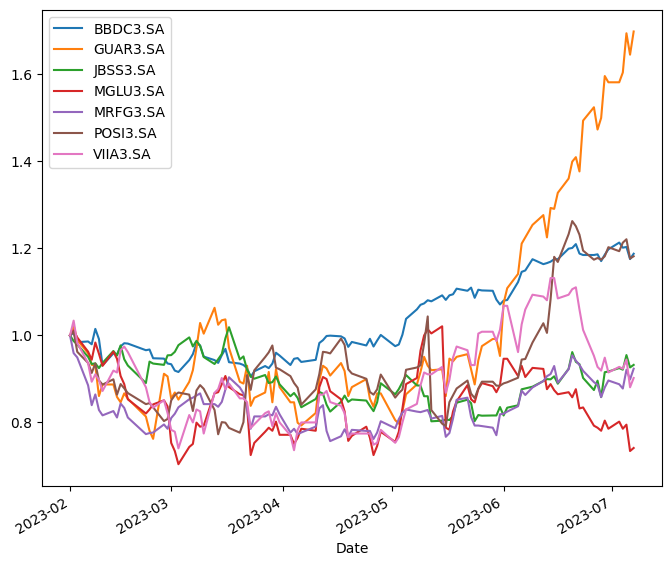

In [8]:
normalizado.plot(figsize = (8,7))

### Preços no dia do aporte

In [9]:
primeiro = df.iloc[0]

In [10]:
primeiro

BBDC3.SA    12.206838
GUAR3.SA     4.880000
JBSS3.SA    19.039181
MGLU3.SA     4.290000
MRFG3.SA     8.110000
POSI3.SA     7.665048
VIIA3.SA     2.350000
Name: 2023-02-01 00:00:00, dtype: float64

In [11]:
qntd=[100,100,100,500,300,1000,4000]
#res_list = []
#for i in range(0, len(primeiro)):
#    res_list.append(primeiro[i] * qntd[i])
    

In [12]:
#comprados = 1000/primeiro

In [13]:
#comprados

In [14]:
# Número de papéis arredondados
#round(comprados, 0)

In [15]:
#comprados = round(comprados, 0)

In [16]:
#comprados

## 7.4. Construção da carteira e da comparação com o IBOV

Como saber qual era o valor que tínhamos em cada papel, por dia? Basta multiplicar o número de papéis que compramos com os preços diários

In [17]:
#PL = df*comprados
PL=df*qntd

In [18]:
PL.head()

,BBDC3.SA,GUAR3.SA,JBSS3.SA,MGLU3.SA,MRFG3.SA,POSI3.SA,VIIA3.SA
Date,,,,,,,
2023-02-01,1220.683765,488.000011,1903.918076,2144.999981,2432.999897,7665.047646,9399.999619
2023-02-02,1228.262138,498.999977,1879.302597,2170.000076,2334.000063,7739.556789,9720.000267
2023-02-03,1201.774120,482.999992,1864.154434,2134.999990,2309.999943,7376.328468,9239.999771
2023-02-06,1203.736115,467.999983,1810.189629,2065.000057,2153.999949,7180.743694,8800.000191
2023-02-07,1195.887756,455.000019,1778.946877,2025.000095,2042.999983,7003.786564,8399.999619


In [19]:
PL.tail()

,BBDC3.SA,GUAR3.SA,JBSS3.SA,MGLU3.SA,MRFG3.SA,POSI3.SA,VIIA3.SA
Date,,,,,,,
2023-07-03,1481.274986,771.999979,1761.000061,1720.000029,2159.999943,9149.999619,8720.000267
2023-07-04,1467.000008,782.999992,1754.000092,1684.999943,2135.999966,9300.000191,8680.000305
2023-07-05,1468.999958,827.000046,1818.000031,1705.000043,2240.999937,9359.999657,8880.000114
2023-07-06,1435.000038,802.999973,1763.999939,1575.000048,2186.999989,9020.000458,8279.999733
2023-07-07,1450.000000,828.999996,1775.000000,1590.000033,2246.999931,9060.000420,8479.999542


In [20]:
# Criando uma nova coluna que vai demonstrar o valor total da nossa carteira, por dia
PL['PL Total'] = PL.sum(axis = 1)

In [21]:
#PL.head()
PL.tail()

,BBDC3.SA,GUAR3.SA,JBSS3.SA,MGLU3.SA,MRFG3.SA,POSI3.SA,VIIA3.SA,PL Total
Date,,,,,,,,
2023-07-03,1481.274986,771.999979,1761.000061,1720.000029,2159.999943,9149.999619,8720.000267,25764.274883
2023-07-04,1467.000008,782.999992,1754.000092,1684.999943,2135.999966,9300.000191,8680.000305,25805.000496
2023-07-05,1468.999958,827.000046,1818.000031,1705.000043,2240.999937,9359.999657,8880.000114,26299.999785
2023-07-06,1435.000038,802.999973,1763.999939,1575.000048,2186.999989,9020.000458,8279.999733,25064.000177
2023-07-07,1450.000000,828.999996,1775.000000,1590.000033,2246.999931,9060.000420,8479.999542,25430.999923


In [22]:
ibov = yf.download('^BVSP', start = inicio, end = fim)

[*********************100%***********************]  1 of 1 completed


In [23]:
ibov.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-02-01,113430.0,113598.0,110729.0,112303.0,112303.0,17821500
2023-02-02,112072.0,112943.0,109747.0,109935.0,109935.0,15241800
2023-02-03,110141.0,110570.0,108185.0,108490.0,108490.0,13235300
2023-02-06,108518.0,108710.0,107416.0,108456.0,108456.0,11514600
2023-02-07,108727.0,109037.0,107234.0,107920.0,107920.0,12956300


In [24]:
ibov.rename(columns = {'Close':'Ibov'}, inplace = True)

In [25]:
ibov = ibov[['Ibov']]

In [26]:
ibov

,Ibov
Date,
2023-02-01,112303.0
2023-02-02,109935.0
2023-02-03,108490.0
2023-02-06,108456.0
2023-02-07,107920.0
...,...
2023-07-03,119673.0
2023-07-04,119076.0
2023-07-05,119549.0


Agora vamos juntar os dados das tabelas do IBOV e da nossa carteira

In [27]:
novo_df = pd.merge(ibov, PL, how = 'inner', on = 'Date')

In [28]:
novo_df.head()

,Ibov,BBDC3.SA,GUAR3.SA,JBSS3.SA,MGLU3.SA,MRFG3.SA,POSI3.SA,VIIA3.SA,PL Total
Date,,,,,,,,,
2023-02-01,112303.0,1220.683765,488.000011,1903.918076,2144.999981,2432.999897,7665.047646,9399.999619,25255.648994
2023-02-02,109935.0,1228.262138,498.999977,1879.302597,2170.000076,2334.000063,7739.556789,9720.000267,25570.121908
2023-02-03,108490.0,1201.774120,482.999992,1864.154434,2134.999990,2309.999943,7376.328468,9239.999771,24610.256720
2023-02-06,108456.0,1203.736115,467.999983,1810.189629,2065.000057,2153.999949,7180.743694,8800.000191,23681.669617
2023-02-07,107920.0,1195.887756,455.000019,1778.946877,2025.000095,2042.999983,7003.786564,8399.999619,22901.620913


<Axes: xlabel='Date'>

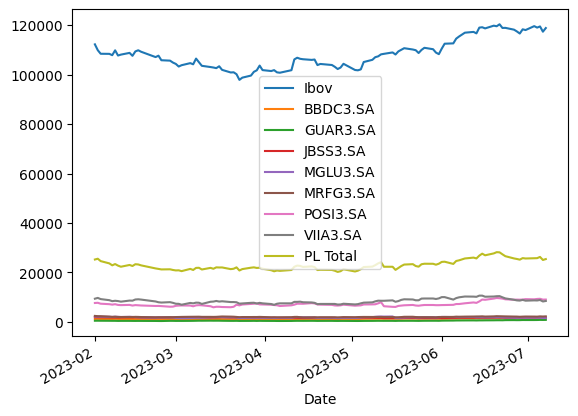

In [29]:
novo_df.plot()

In [30]:
novo_normalizado = (novo_df/novo_df.iloc[0])*100

In [31]:
novo_normalizado

,Ibov,BBDC3.SA,GUAR3.SA,JBSS3.SA,MGLU3.SA,MRFG3.SA,POSI3.SA,VIIA3.SA,PL Total
Date,,,,,,,,,
2023-02-01,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
2023-02-02,97.891419,100.620830,102.254091,98.707115,101.165506,95.930956,100.972064,103.404262,101.245159
2023-02-03,96.604721,98.450897,98.975406,97.911484,99.533800,94.944515,96.233302,98.297874,97.444563
2023-02-06,96.574446,98.611626,95.901634,95.077076,96.270400,88.532677,93.681658,93.617027,93.767813
2023-02-07,96.097166,97.968679,93.237707,93.436104,94.405600,83.970410,91.373034,89.361702,90.679202
...,...,...,...,...,...,...,...,...,...
2023-07-03,106.562603,121.347971,158.196713,92.493479,80.186482,88.779286,119.373030,92.765964,102.013909
2023-07-04,106.031005,120.178547,160.450814,92.125817,78.554777,87.792851,121.329972,92.340433,102.175163
2023-07-05,106.452187,120.342385,169.467219,95.487303,79.487182,92.108509,122.112739,94.468090,104.135118


<Axes: xlabel='Date'>

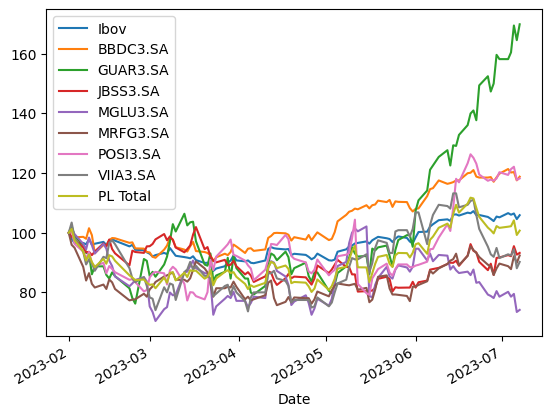

In [32]:
novo_normalizado.plot()

<Axes: xlabel='Date'>

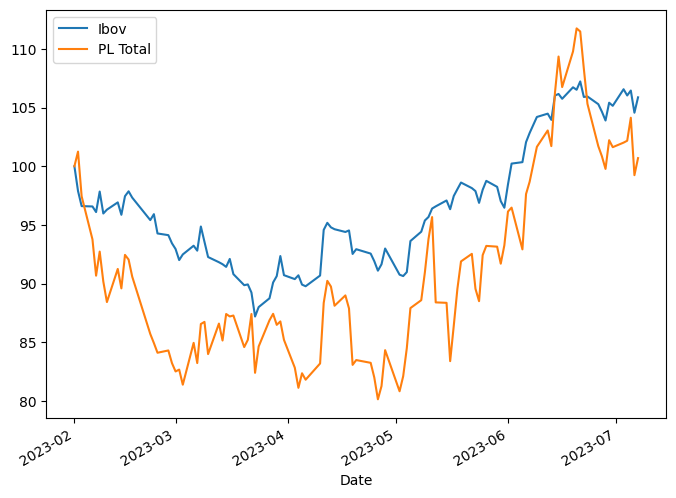

In [33]:
novo_normalizado[['Ibov','PL Total']].plot(figsize = (8,6))

E se o usuário conseguisse determinar quanto ele investiria em cada ativo?

In [34]:
ativos

['BBDC3.SA',
 'GUAR3.SA',
 'JBSS3.SA',
 'MGLU3.SA',
 'MRFG3.SA',
 'POSI3.SA',
 'VIIA3.SA']